# Exploratory Data Analysis
##  In this notebook I will perform EDA Analysis on the data_salary_cleaned dataset.
### Before to start the EDA, I need to perform other operations on the dataset to make it ready to use for that phase.

In [2]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data
df = pd.read_csv("data_salary_cleaned.csv")

In [4]:
#Show the first 5 lines of the dataframe
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,AVG_salary,Company,State,same_state,Age,Python,R_Studio,Spark,AWS,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,51,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,40,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,14,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,59,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,26,1,0,0,0,1


In [11]:
#Define a function to simplify the content of the Job Title column
def title_semplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
 
#Do the same thing for the seniority   
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [9]:
#Create a new column 'Job simplified'
df['Job simplified'] = df['Job Title'].apply(title_semplifier)
df['Job simplified'].value_counts()

Job simplified
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [16]:
#Create a new column 'Seniority'
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts()

Seniority
na        519
senior    220
junior      3
Name: count, dtype: int64

In [20]:
#In the dataset, Los Angeles is defined as a State, so I need to fix that
df['State'].value_counts()

State
CA             151
MA             103
NY              72
VA              41
IL              40
MD              35
PA              33
TX              28
WA              21
NC              21
NJ              17
FL              16
OH              14
TN              13
DC              11
CO              11
WI              10
IN              10
UT              10
AZ               9
MO               9
AL               8
GA               6
KY               6
DE               6
MI               6
CT               5
IA               5
LA               4
OR               4
NE               4
NM               3
KS               3
ID               2
MN               2
Los Angeles      1
RI               1
SC               1
Name: count, dtype: int64

In [21]:
df['State'] = df['State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['State'].value_counts()

State
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [23]:
#Find the job description lenght
df['Description_len'] = df['Job Description'].apply(lambda x: len(x))
df['Description_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Description_len, Length: 742, dtype: int64

In [27]:
#Create a new column 'Number_Competitors' to see the numbers of competitors
df['Number_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Number_Competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Number_Competitors, Length: 742, dtype: int64

In [29]:
#Transform hourly wage in annualy wage (this operation is performed both on Min_salary and Max_salary columns)
df['Min_salary'] = df.apply(lambda x: x.Min_salary*2 if x.Hourly == 1 else x.Min_salary, axis = 1)
df[df.Hourly == 1][['Hourly', 'Min_salary', 'Max_salary']]

,Hourly,Min_salary,Max_salary
165,1,34,24
177,1,42,34
197,1,36,25
202,1,42,34
210,1,30,25
246,1,34,24
271,1,42,34
337,1,36,25
345,1,48,39
357,1,42,34


In [30]:
df['Max_salary'] = df.apply(lambda x: x.Max_salary*2 if x.Hourly == 1 else x.Max_salary, axis = 1)
df[df.Hourly == 1][['Hourly', 'Min_salary', 'Max_salary']]

,Hourly,Min_salary,Max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [32]:
#Now I have to remove the \n character from the Company column
df.Company

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: Company, Length: 742, dtype: object

In [33]:
df['Company'] = df.Company.apply(lambda x: x.replace('\n', ''))
df['Company']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company, Length: 742, dtype: object

# EDA Analysis

In [34]:
#Show, for all the continues values in the dataframe, a static overwiev
df.describe()

,Rating,Founded,Hourly,Employer_Provided_Salary,Min_salary,Max_salary,AVG_salary,same_state,Age,Python,R_Studio,Spark,AWS,Excel,Description_len,Number_Competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,50.322102,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,54.026459,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,28.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,63.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


# Let's start with the continuos variables

## Plot some histograms to see the distribution of data

<Axes: >

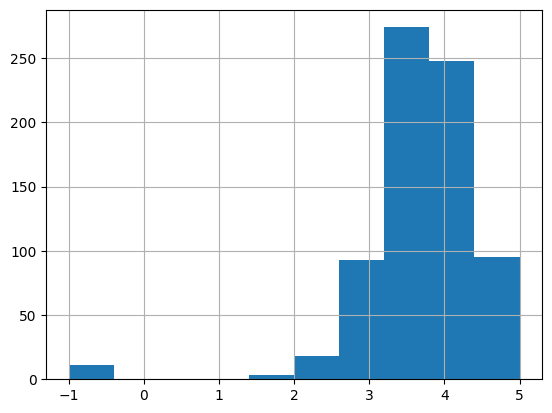

In [36]:
#Plot a histogram for the Rating column
df.Rating.hist()

<Axes: >

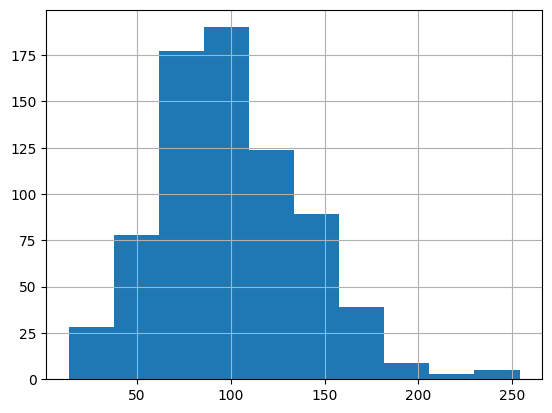

In [37]:
#Plot a histogram for the AVG_salary column
#The AVG_salary follows a normal distribution
df.AVG_salary.hist()

<Axes: >

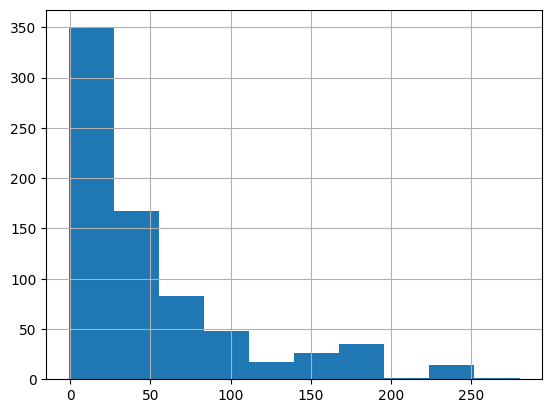

In [38]:
#Plot a histogram for the Age column
#The age of the companies follows an exponential distribution
#If I use this data I have to normalize it (expecially if I use a Regression Model)
df.Age.hist()

<Axes: >

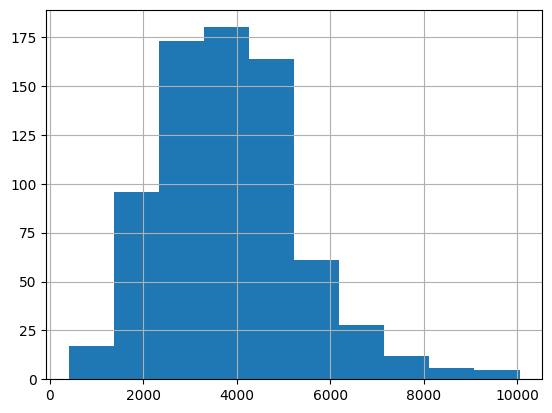

In [39]:
#Plot a histogram for the Description_len column
#The Description_len follows a pretty close normal distribution
df.Description_len.hist()

## Plot some boxplots 
### Let's see if there are some outliers

<Axes: >

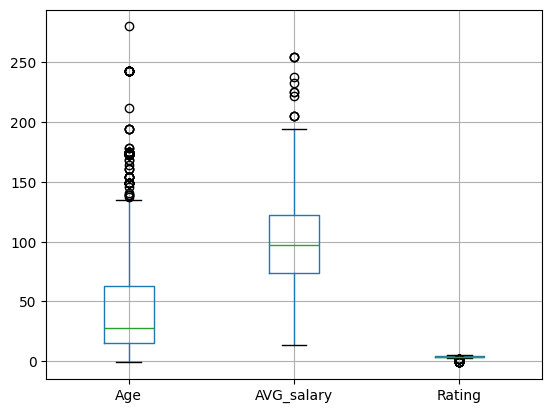

In [42]:
df.boxplot(column=['Age', 'AVG_salary', 'Rating'])

<Axes: >

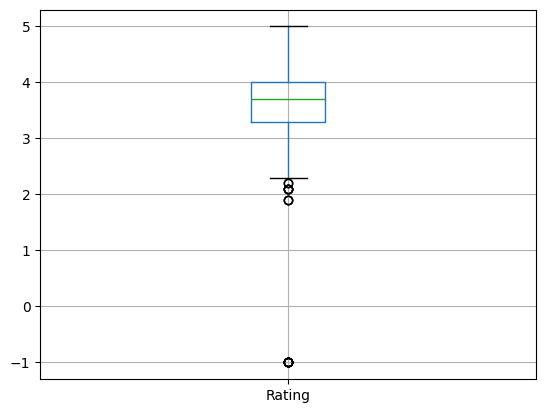

In [43]:
df.boxplot(column='Rating')

## Correlation beetwen variables

In [49]:
df[['Age', 'AVG_salary', 'Rating','Description_len', 'Number_Competitors']].corr()

,Age,AVG_salary,Rating,Description_len,Number_Competitors
Age,1.000000,0.019328,0.027660,0.164995,0.129838
AVG_salary,0.019328,1.000000,0.013492,0.078808,0.093813
Rating,0.027660,0.013492,1.000000,-0.012281,0.027190
Description_len,0.164995,0.078808,-0.012281,1.000000,0.104620
Number_Competitors,0.129838,0.093813,0.027190,0.104620,1.000000


<Axes: >

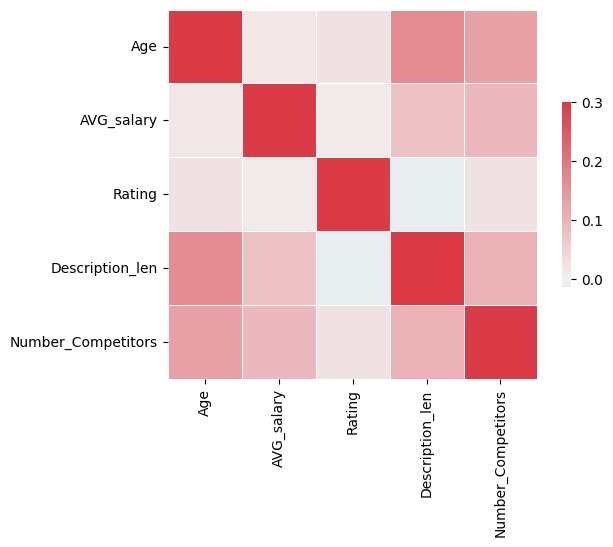

In [50]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age', 'AVG_salary', 'Rating','Description_len', 'Number_Competitors']].corr(), vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap)

### From this correlation map we can see that the Description_len is positively correlated with Age and AVG_salary and also that Rating is negatively correlated with Description_len. It look likes that Age(older companies) have more competition. Also, the Description_len is generally longer for companies that have more competition.

# Now let's check the categorical variables

In [48]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided_Salary', 'Min_salary', 'Max_salary',
       'AVG_salary', 'Company', 'State', 'same_state', 'Age', 'Python',
       'R_Studio', 'Spark', 'AWS', 'Excel', 'Job simplified', 'Seniority',
       'Description_len', 'Number_Competitors'],
      dtype='object')

In [51]:
df_categorical = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company', 'State', 'same_state', 'Python',
       'R_Studio', 'Spark', 'AWS', 'Excel', 'Job simplified', 'Seniority']]

Graph for Location: total = 200


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


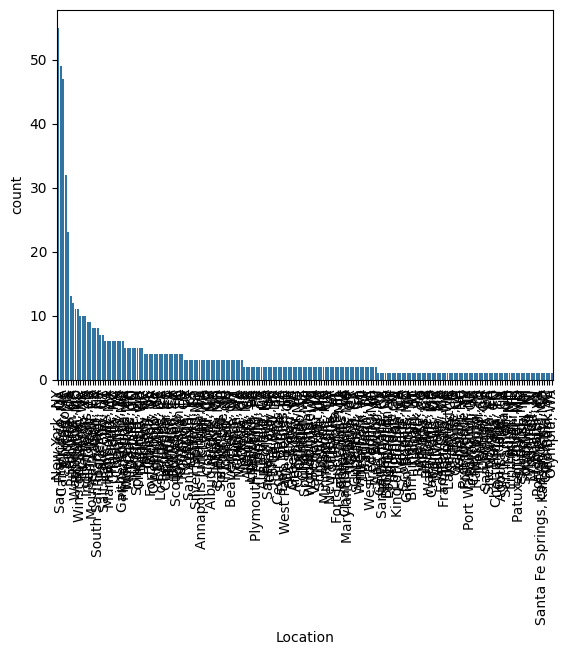

Graph for Headquarters: total = 198


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


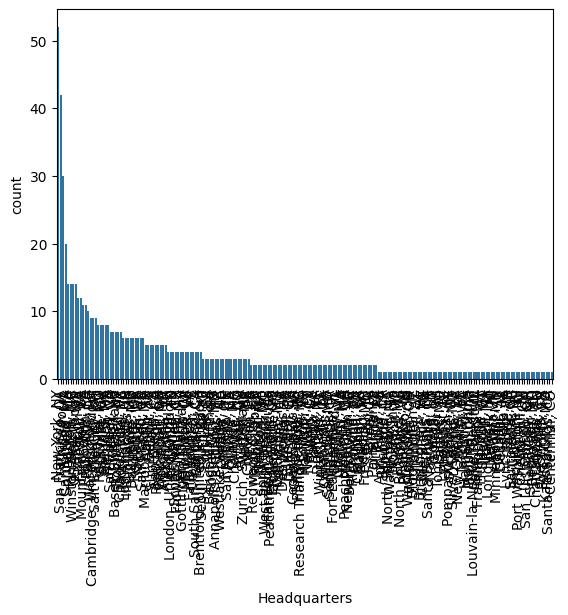

Graph for Size: total = 9


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


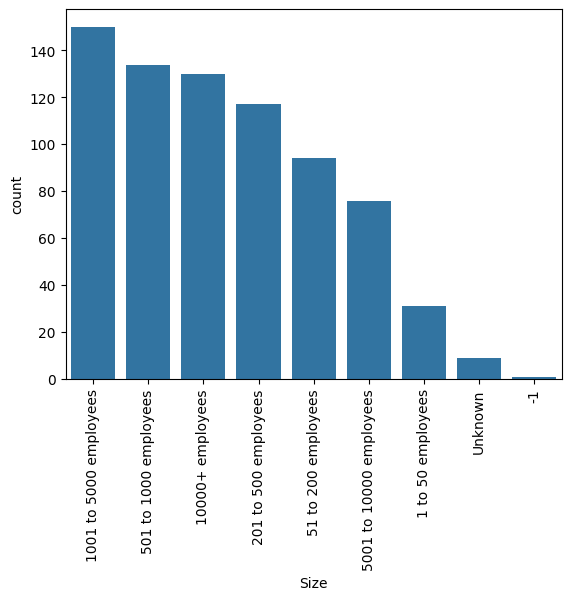

Graph for Type of ownership: total = 11


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


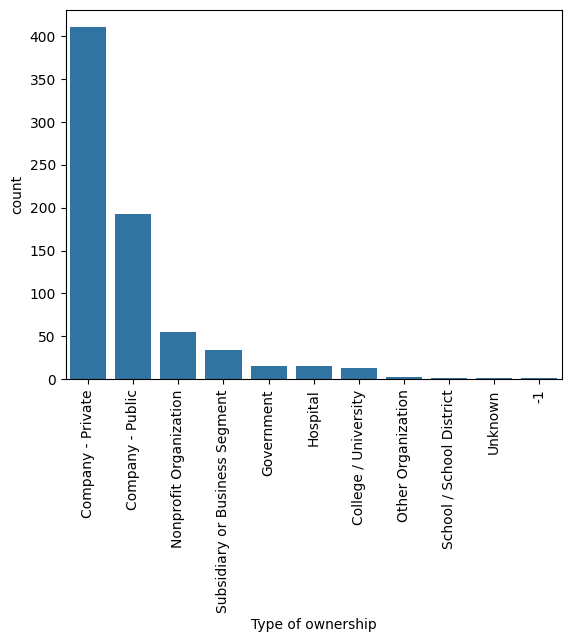

Graph for Industry: total = 60


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


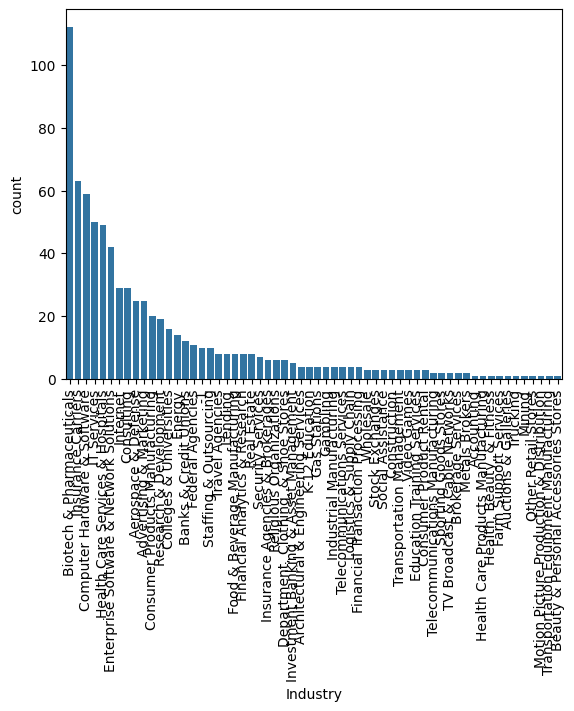

Graph for Sector: total = 25


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


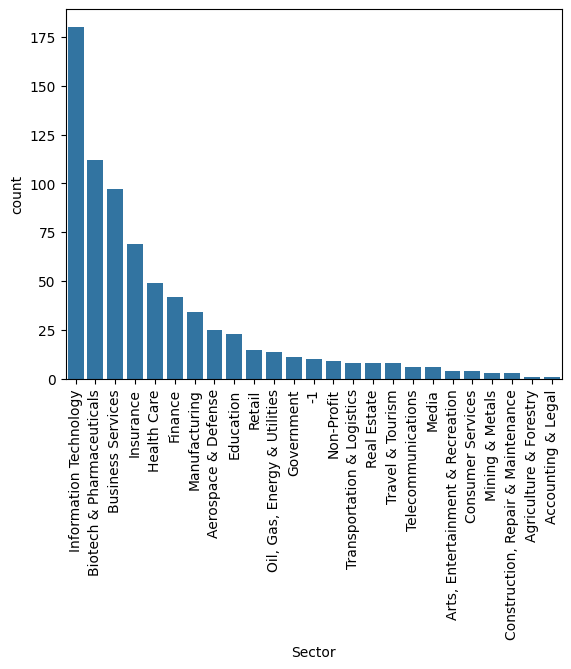

Graph for Revenue: total = 14


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


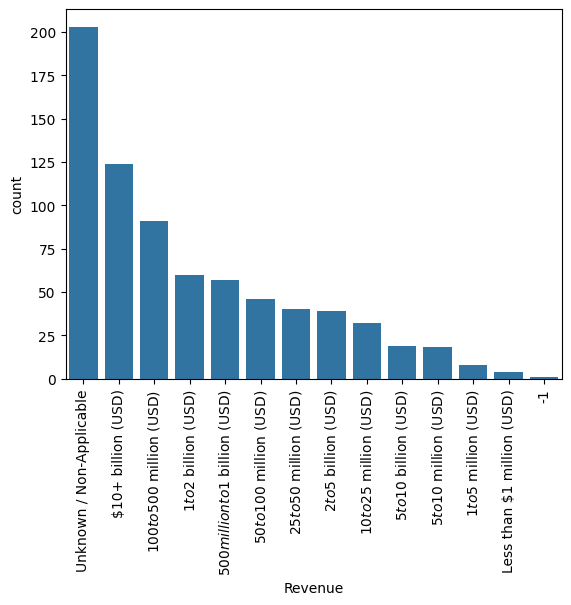

Graph for Company: total = 343


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


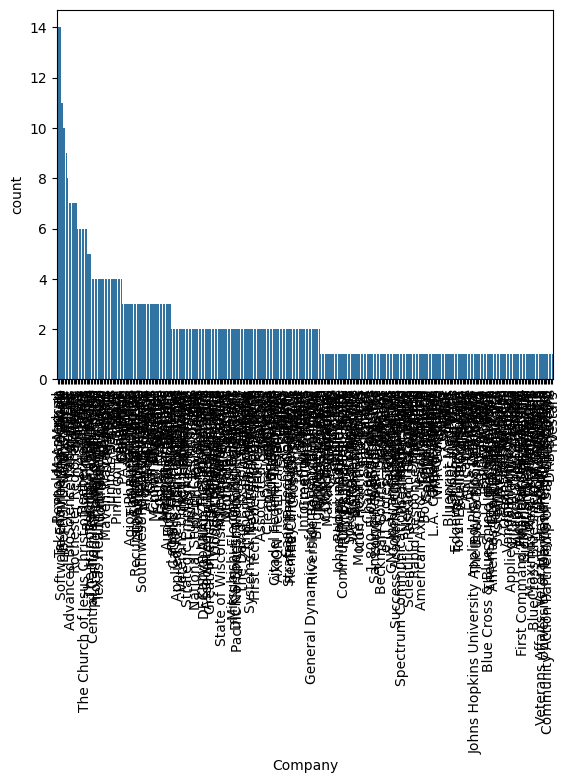

Graph for State: total = 37


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


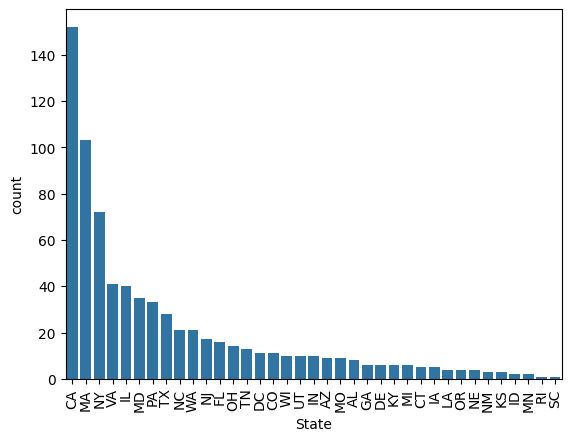

Graph for same_state: total = 2


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


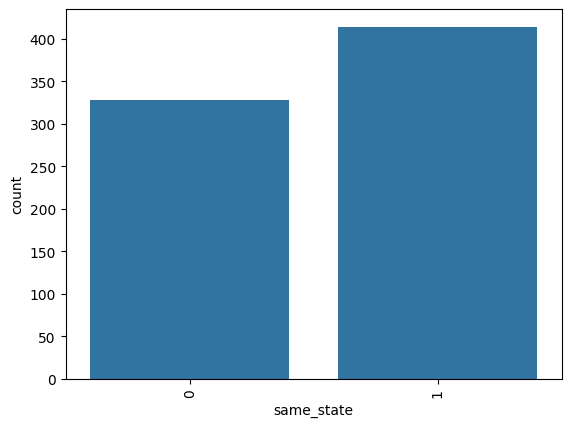

Graph for Python: total = 2


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


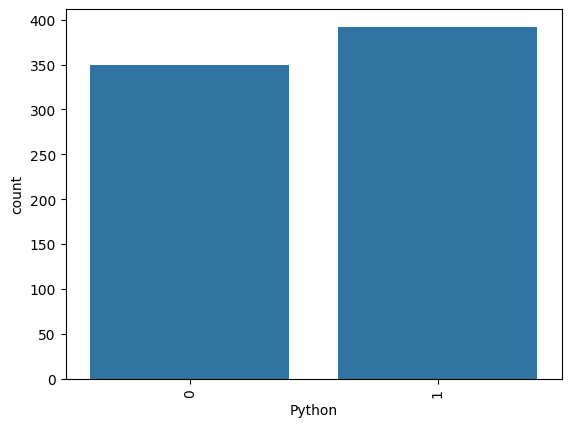

Graph for R_Studio: total = 2


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


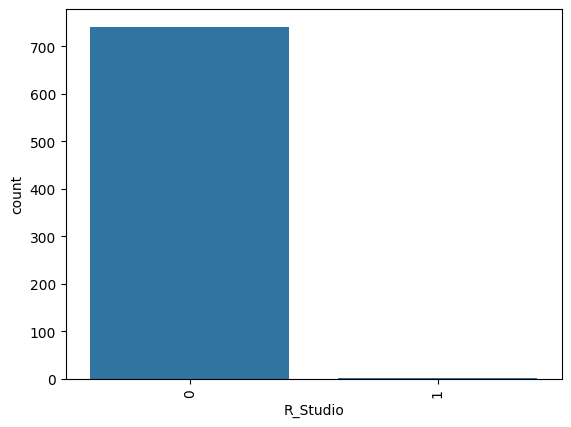

C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


Graph for Spark: total = 2


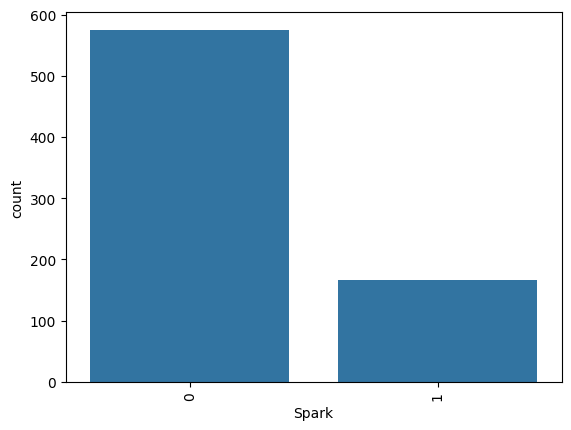

C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


Graph for AWS: total = 2


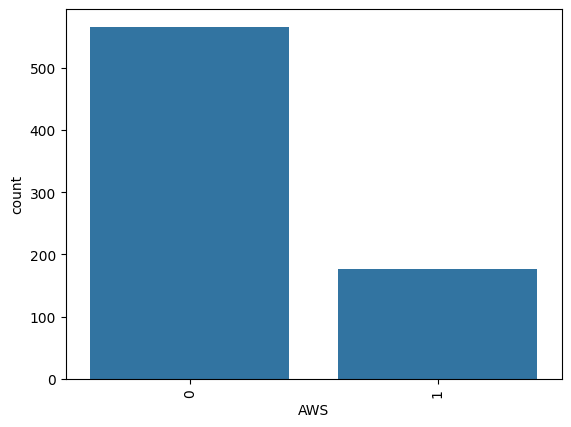

Graph for Excel: total = 2


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


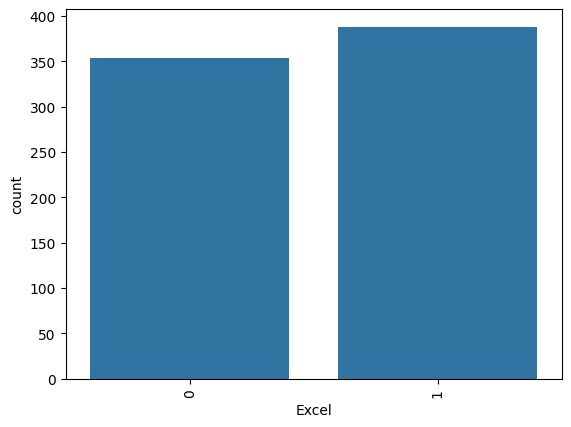

Graph for Job simplified: total = 7


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


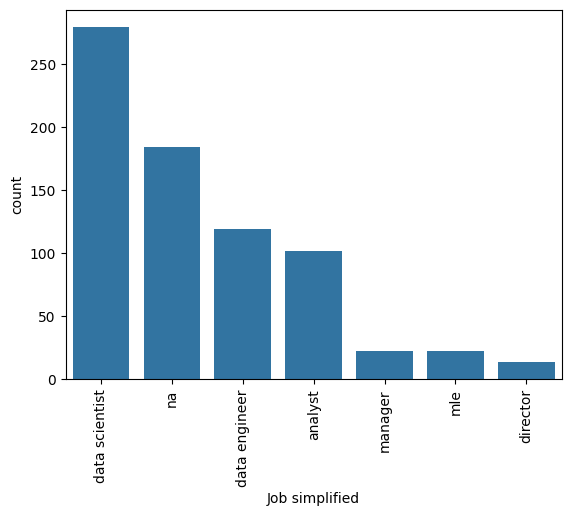

C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1029197096.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


Graph for Seniority: total = 3


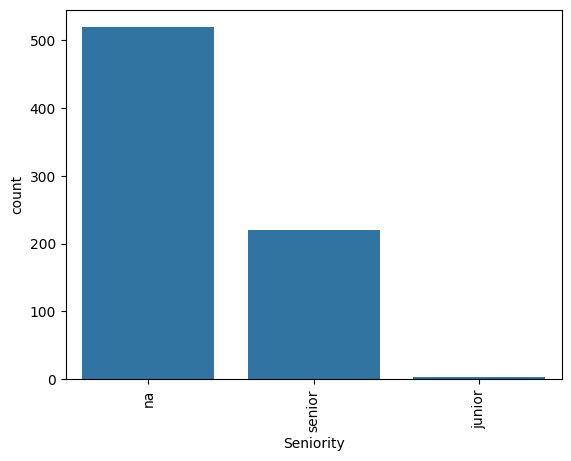

In [55]:
for i in df_categorical.columns:
    cat_num = df_categorical[i]. value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1737040506.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


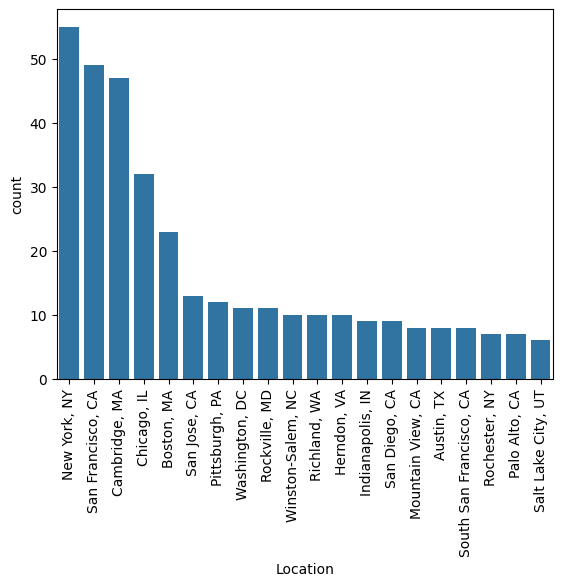

Graph for Headquarters: total = 20


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1737040506.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


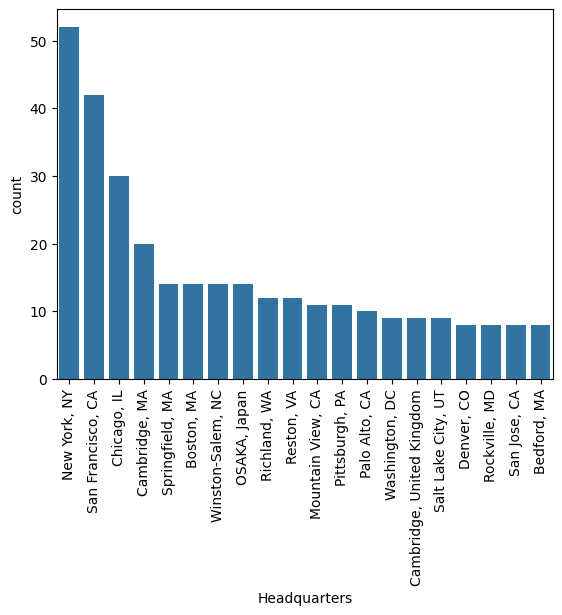

Graph for Company: total = 20


C:\Users\mely7\AppData\Local\Temp\ipykernel_7336\1737040506.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


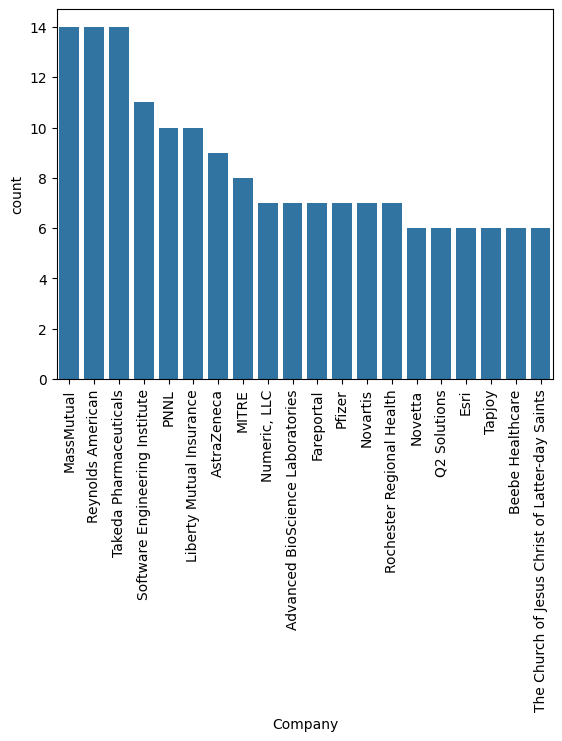

In [57]:
for i in df_categorical[['Location', 'Headquarters', 'Company']]:
    cat_num = df_categorical[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

# Let's make some pivot tables

In [58]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided_Salary', 'Min_salary', 'Max_salary',
       'AVG_salary', 'Company', 'State', 'same_state', 'Age', 'Python',
       'R_Studio', 'Spark', 'AWS', 'Excel', 'Job simplified', 'Seniority',
       'Description_len', 'Number_Competitors'],
      dtype='object')

In [61]:
#Plot a pivot table
pd.pivot_table(df, index=['Job simplified', 'Seniority'], values='AVG_salary')

AVG_salary
Job simplified Seniority            
analyst        junior      53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [70]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['State', 'Job simplified'], values='AVG_salary', aggfunc='count').sort_values('State', ascending= False)

AVG_salary
State Job simplified            
WI    na                       4
      data scientist           3
      analyst                  3
WA    na                       1
      data scientist          17
      analyst                  3
VA    na                       5
      mle                      2
      data scientist          18
      data engineer           10
      analyst                  6
UT    data engineer            3
      analyst                  4
      data scientist           3
TX    na                       7
      data scientist          13
      data engineer            8
TN    data scientist           1
      data engineer           10
      analyst                  2
SC    na                       1
RI    analyst                  1
PA    manager                  3
      data engineer            1
      data scientist           6
      analyst                  8
      mle                      7
      na                       8
OR    data scientist           3
      data engineer            1
OH    na                       3
      data scientist           7
      analyst                  4
NY    na                      12
      mle                      2
      data scientist          40
      data engineer            4
      analyst                 14
NM    data scientist           3
NJ    data scientist           4
      analyst                  6
      data engineer            2
      manager                  2
      director                 2
      na                       1
NE    na                       4
NC    na                      12
      data scientist           3
      data engineer            6
MO    na                       3
      manager                  1
      data scientist           3
      analyst                  2
MN    data engineer            1
      analyst                  1
MI    manager                  2
      data scientist           4
MD    na                      16
      data scientist          13
      data engineer            3
      analyst                  3
MA    na                      46
      manager                  5
      director                 6
      data scientist          30
      data engineer           12
      analyst                  4
LA    analyst                  1
      data engineer            2
      na                       1
KY    na                       4
      data scientist           2
KS    mle                      3
IN    na                       4
      data scientist           2
      data engineer            4
IL    analyst                  3
      na                       6
      mle                      2
      director                 6
      data scientist          15
      data engineer            8
ID    analyst                  2
IA    analyst                  2
      data engineer            3
GA    data scientist           3
      na                       3
FL    data scientist           7
      data engineer            3
      analyst                  6
DE    na                       6
DC    data scientist           5
      data engineer            4
      analyst                  2
CT    na                       3
      data scientist           2
CO    mle                      1
      data engineer            3
      analyst                  1
      na                       3
      data scientist           3
CA    na                      27
      mle                      5
      manager                  9
      data scientist          68
      data engineer           25
      analyst                 18
AZ    data scientist           1
      data engineer            5
      analyst                  1
      na                       2
AL    na                       2
      data engineer            1
      analyst                  5

In [75]:
pd.pivot_table(df[df['Job simplified'] == 'data scientist'], index='State', values='AVG_salary').sort_values('AVG_salary', ascending= False)

,AVG_salary
State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [76]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided_Salary', 'Min_salary', 'Max_salary',
       'AVG_salary', 'Company', 'State', 'same_state', 'Age', 'Python',
       'R_Studio', 'Spark', 'AWS', 'Excel', 'Job simplified', 'Seniority',
       'Description_len', 'Number_Competitors'],
      dtype='object')

In [80]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Number_Competitors', 'Hourly', 'Employer_Provided_Salary', 'Python', 'R_Studio', 'Spark', 'AWS', 'Excel', 'Type of ownership', 'AVG_salary']]

In [84]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='AVG_salary').sort_values('AVG_salary', ascending = False))

Rating
        AVG_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          AVG_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'AVG_salary' not 1-dimensional

In [86]:
pd.pivot_table(df_pivots, index='Revenue', columns='Python', values='AVG_salary', aggfunc='count')

Python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


## The last thing I do is to make a word cloud to see what words are most popularly used when talikng about candidates

In [91]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mely7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [96]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mely7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

<function matplotlib.pyplot.show(close=None, block=None)>

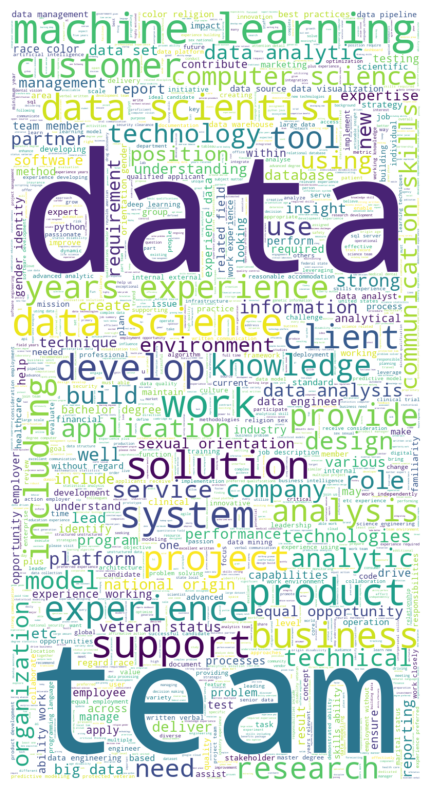

In [97]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    #remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show

